In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("tvmarketing.csv")

In [40]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [7]:
# 1. Import dataset and display first 5 rows
df.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [12]:
# 2. Check column data types
df.dtypes


TV       float64
Sales    float64
dtype: object

In [13]:
# 3. Check the shape of the Data Frame (rows, columns)
df.shape

(200, 2)

In [20]:
# 4. Look at summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


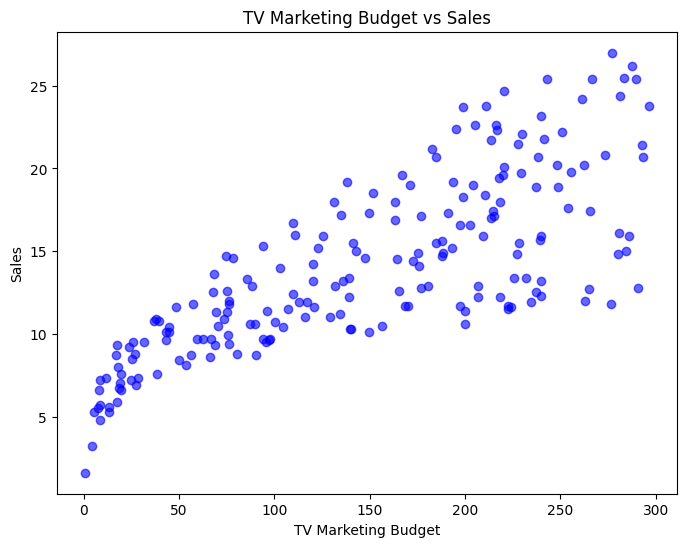

In [21]:
# 5. Visualize the relationship between the features and the dependent variable using scatterplots
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df['TV'], df['Sales'], color='blue', alpha=0.6)
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('TV Marketing Budget vs Sales')
plt.show()


In [41]:
# 6. Prepare X (feature variables) and y (response variable)
# X should be a DataFrame; y can be a Series
X = df[['TV']]
y = df['Sales']


In [42]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [43]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [59]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [60]:
X_train

,TV
102,280.2
185,205.0
127,80.2
53,182.6
124,229.5
...,...
125,87.2
11,214.7
88,88.3
27,240.1


In [71]:
# 8. Print the shape of train data and test data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (140, 1)
X_test shape: (60, 1)
y_train shape: (140,)
y_test shape: (60,)


In [88]:
# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values

import numpy as np

# Convert training data to numpy arrays
X_train_np = X_train.values.flatten()  # flatten to 1D array
y_train_np = y_train.values

# Calculate means
mean_x = np.mean(X_train_np)
mean_y = np.mean(y_train_np)

# Calculate slope (b1)
numerator = np.sum((X_train_np - mean_x) * (y_train_np - mean_y))
denominator = np.sum((X_train_np - mean_x)**2)
b1 = numerator / denominator

# Calculate intercept (b0)
b0 = mean_y - b1 * mean_x

print("\nManual Linear Regression Coefficients:")
print("Intercept (b0):", b0)
print("Slope (b1):", b1)



Manual Linear Regression Coefficients:
Intercept (b0): 7.12078505670911
Slope (b1): 0.04679188906301075


In [100]:
# 10.Create the model using the calculated coefficients and make predictions on the testing set
y_pred_manual = b0 + b1 * X_test

y_pred_manual[:5]

,TV
157,14.130210
192,7.925606
144,11.622165
96,16.366862
175,20.077459


In [101]:
# 11.Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# 12.Print the intercept and coefficients
print("Sklearn Intercept:", model.intercept_)
print("Sklearn Coefficient:", model.coef_[0])


Sklearn Intercept: 7.120785056709107
Sklearn Coefficient: 0.04679188906301077


In [131]:
# 13.Make predictions on the testing set - y_pred
y_pred= model.predict(X_test)

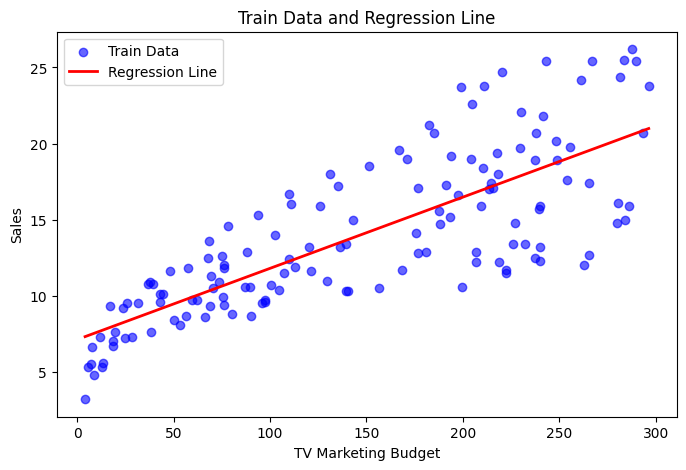

In [132]:
# 14.Plot train data and the model
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label="Train Data")
# Create points for the regression line
x_line = np.linspace(X_train['TV'].min(), X_train['TV'].max(), 100)
y_line = model.intercept_ + model.coef_[0] * x_line

plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Train Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()


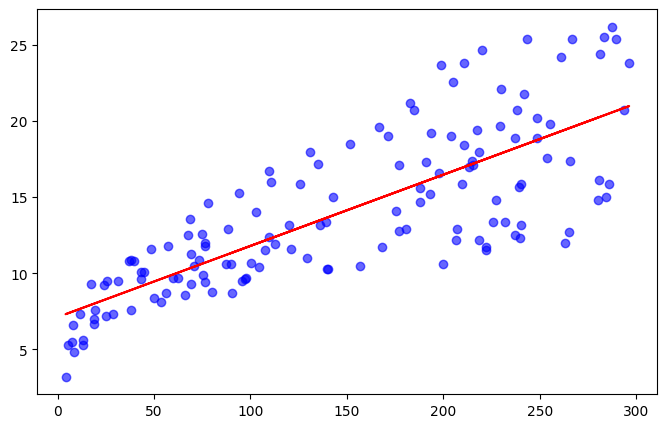

In [133]:
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label="Train Data")
plt.plot(X_train, model.predict(X_train), color='red', label="Regression Line")

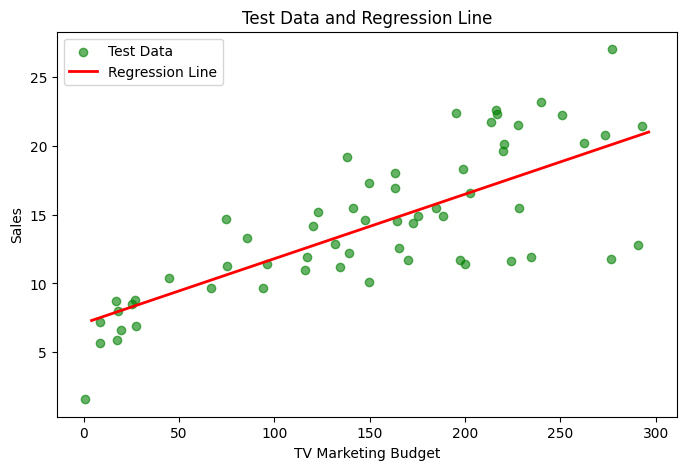

In [134]:
# 15.Plot test data and the model
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='green', alpha=0.6, label="Test Data")
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Test Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [135]:
# 16.Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation (scikit-learn):")
print("Mean Squared Error (MSE):", mse)
print("R Squared:", r2)



Model Evaluation (scikit-learn):
Mean Squared Error (MSE): 11.124503071965858
R Squared: 0.5968413595108859


In [139]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library

# Convert test data and predictions to numpy arrays (if not already)
y_test_np = y_test.values
n = len(y_test_np)
p = 1

# Calculate R Squared manually
ss_total = np.sum((y_test_np - np.mean(y_test_np))**2)
ss_res = np.sum((y_test_np - y_pred)**2)
r_squared_manual = 1 - (ss_res/ss_total)

# Calculate Adjusted R Squared
adjusted_r_squared = 1 - (1 - r_squared_manual) * (n - 1) / (n - p - 1)

print("\nManual Evaluation:")
print("Manual R Squared:", r_squared_manual)
print("Manual Adjusted R Squared:", adjusted_r_squared)



Manual Evaluation:
Manual R Squared: 0.5968413595108859
Manual Adjusted R Squared: 0.5898903484679702
